In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_diabetes

In [3]:
diabetes = load_diabetes(as_frame=True)

X = diabetes.frame
X.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [4]:
target = X['target']
features = X.drop(['target'], axis=1)

In [5]:
features_mean = features.mean()
features_std = features.std()
Z = (features - features_mean) / features_std  
Z.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.799594,1.064282,1.295620,0.459320,-0.928693,-0.731236,-0.911418,-0.054438,0.418057,-0.370569
1,-0.039522,-0.937474,-1.080955,-0.552878,-0.177423,-0.402430,1.562643,-0.829361,-1.434962,-1.936285
2,1.791277,1.064282,0.933475,-0.119079,-0.957588,-0.718084,-0.679475,-0.054438,0.060087,-0.544537
3,-1.870322,-0.937474,-0.243495,-0.769778,0.256002,0.524802,-0.756789,0.720486,0.476443,-0.196600
4,0.113044,-0.937474,-0.764079,0.459320,0.082632,0.327519,0.170984,-0.054438,-0.671740,-0.979458


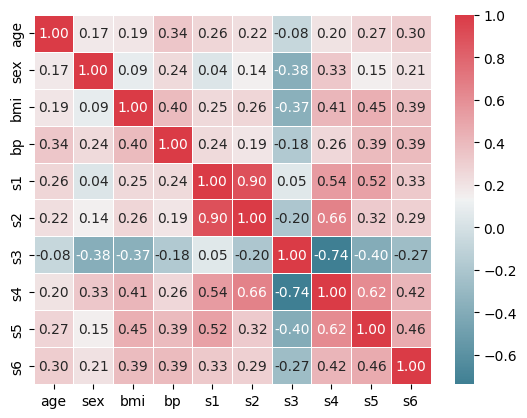

In [6]:
corr = Z.cov()
sns.heatmap(corr, cmap=sns.diverging_palette(220, 10, as_cmap=True), annot=True, fmt=".2f", linewidths=0.5)
plt.show()

In [7]:
eigenvalues, eigenvectors = np.linalg.eig(corr)
eigenvalues

array([4.02421075, 1.49231968, 1.20596626, 0.9554764 , 0.00856073,
       0.07832002, 0.66218139, 0.43368204, 0.60271708, 0.53656565])

In [8]:
sorted_index = np.argsort(eigenvalues)[::-1]

sorted_eigenvalues = eigenvalues[sorted_index]
sorted_eigenvectors = eigenvectors[:, sorted_index]

sorted_eigenvalues

array([4.02421075, 1.49231968, 1.20596626, 0.9554764 , 0.66218139,
       0.60271708, 0.53656565, 0.43368204, 0.07832002, 0.00856073])

In [9]:
explained_variance_ratio = sorted_eigenvalues / np.sum(sorted_eigenvalues)
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

print("Explained Variance Ratio:", explained_variance_ratio)
print("Cumulative Explained Variance:", cumulative_explained_variance)

Explained Variance Ratio: [0.40242108 0.14923197 0.12059663 0.09554764 0.06621814 0.06027171
 0.05365657 0.0433682  0.007832   0.00085607]
Cumulative Explained Variance: [0.40242108 0.55165304 0.67224967 0.76779731 0.83401545 0.89428716
 0.94794372 0.99131192 0.99914393 1.        ]


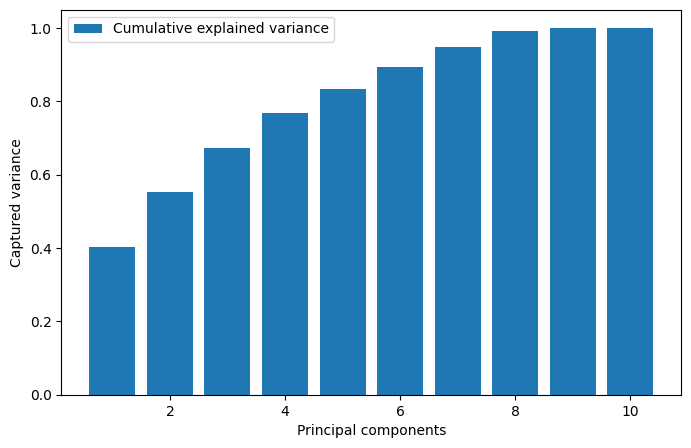

In [26]:
plt.figure(figsize=(8, 5))
plt.bar(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, label='Cumulative explained variance')

plt.xlabel("Principal components")
plt.ylabel("Captured variance")

plt.legend()
plt.show()

In [50]:
X_pca = np.dot(Z, sorted_eigenvectors)
X_pca[:, :2] # 2 columns

array([[-5.86534500e-01, -1.94462866e+00],
       [ 2.82842037e+00,  1.37052873e+00],
       [-2.71820537e-01, -1.63305076e+00],
       [-4.92253652e-02,  3.81845342e-01],
       [ 7.55565190e-01,  8.11041218e-01],
       [ 3.96183161e+00, -3.80628802e-01],
       [ 1.99156056e+00, -8.04621341e-01],
       [-2.07351720e+00,  1.82583592e+00],
       [-6.02327524e-01, -8.80248457e-01],
       [ 2.11902187e-01, -4.92331384e-01],
       [ 3.85183982e+00, -1.53035114e+00],
       [-3.96462015e-01, -6.31818830e-01],
       [ 1.59455191e+00,  9.80352546e-01],
       [-3.18100326e-01, -6.50354315e-01],
       [ 1.68352872e+00,  1.81587430e+00],
       [-2.95028327e+00,  9.48990920e-01],
       [-1.59279178e-01,  9.11270403e-01],
       [-2.28559155e+00, -1.48438064e-01],
       [ 1.15485068e+00, -4.27815777e-01],
       [ 1.76955963e+00,  9.27799138e-01],
       [ 2.00747190e+00, -2.89672691e-01],
       [ 1.92934652e+00, -8.30387212e-01],
       [ 1.67425605e+00,  7.18864936e-01],
       [-3.

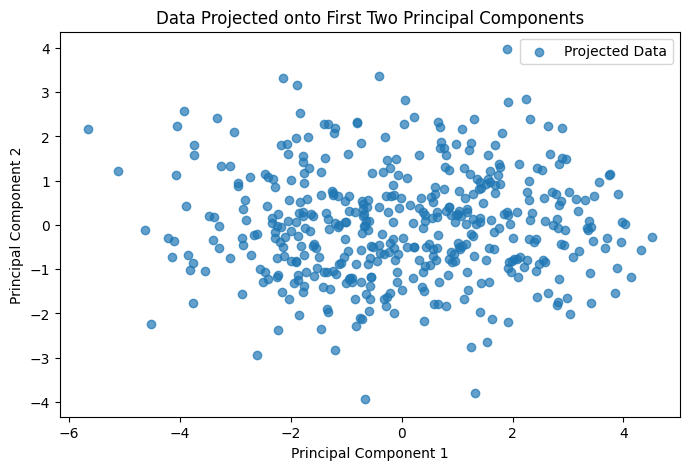

In [52]:
plt.figure(figsize=(8, 5))
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.7, label='Projected Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.title('Data Projected onto First Two Principal Components')
plt.show()